# Ensembling vgg16-Resnet50



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

**Load images**

In [ ]:
images = "/content/drive/MyDrive/parkinsons t2/train"

In [ ]:
folders = os.listdir(images)
print(folders)

['pd', 'control']


In [ ]:
image_data = []
labels = []

In [ ]:
label_dict = {
    'control':0,
    'pd':1
}

In [ ]:
from keras.preprocessing import image

for ix in folders:
    path = os.path.join(images,ix)
    for im in os.listdir(path):
        img = image.load_img(os.path.join(path,im),target_size = ((512,512)))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[ix])
    

In [ ]:
print(len(image_data),len(labels))

1040 1040


In [ ]:
combined = list(zip(image_data,labels))
image_data[:],labels[:] = zip(*combined)

In [ ]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
x_train = np.array(image_data)
y_train = np.array(labels)

print(x_train.shape,y_train.shape)

(1040, 512, 512, 3) (1040,)


In [ ]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
print(x_train.shape,y_train.shape)

(1040, 512, 512, 3) (1040, 2)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

**Data augmentation**

In [ ]:
augment = ImageDataGenerator( 
                             rotation_range=20,
                              width_shift_range=0.01, 
                              height_shift_range=0.01, 
                              horizontal_flip=False, 
                              vertical_flip=False,
                            )
augment.fit(x_train)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

**Deep Ensemble CNN**

VGG16 and Resnet50-Average Layer

In [ ]:
model = VGG16(include_top = False,weights = 'imagenet',input_shape = (512,512,3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0     

In [ ]:
for ix in range(len(model.layers)):
    print(ix,model.layers[ix])

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f792d5e3910>
1 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7919d90b90>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7919d29d10>
3 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f79194a8fd0>
4 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7910142790>
5 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7910147f50>
6 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7910153e90>
7 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7910147ad0>
8 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f791015b690>
9 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7910166910>
10 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f791015b3d0>
11 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7910168990>
12 <tensorflow.python.ke

**Fine-Tuninng**

In [ ]:
for layer in model.layers[:16]:
    layer.trainable = False
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)


0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [ ]:
av1 = Flatten()(model.output)
fc1 = Dense(256,activation='relu',kernel_regularizer= l2(0.01),input_dim=256)(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(128,activation='relu',kernel_regularizer= l2(0.01),input_dim=128)(d1)
d2 = Dropout(0.5)(fc2)
fc3 = Dense(2,activation = 'sigmoid')(d2)


model_vgg = Model(model.input,fc3)
model_vgg.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0   

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
model1 = ResNet50(include_top=False, input_shape=(512,512,3), weights='imagenet')

In [ ]:
model1.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 256, 256, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
for ix in range(len(model1.layers)):
    print(ix,model1.layers[ix])

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f79100e4950>
1 <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f77ba3d1550>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f78bc9031d0>
3 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f78bccc0250>
4 <tensorflow.python.keras.layers.core.Activation object at 0x7f77ba3e07d0>
5 <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f77ba4cfbd0>
6 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f77ba39c850>
7 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f77ba3ab710>
8 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f77ba3f3650>
9 <tensorflow.python.keras.layers.core.Activation object at 0x7f77ba4c5ad0>
10 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f77ba3ab990>
11 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization o

**Fine-Tuning**

In [ ]:
for layer in model1.layers[:169]:
    layer.trainable = False
for i, layer in enumerate(model1.layers):
    print(i, layer.name, layer.trainable)

0 input_4 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [ ]:
av1 = Flatten()(model1.output)
fc1 = Dense(256,activation='relu',kernel_regularizer= l2(0.01),input_dim=256)(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(128,activation='relu',kernel_regularizer= l2(0.01),input_dim=128)(d1)
d2 = Dropout(0.5)(fc2)
fc3 = Dense(2,activation = 'sigmoid')(d2)


model_R = Model(model1.input,fc3)
model_R.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 256, 256, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

**Average-Layer**

In [ ]:
import tensorflow as tf
models = [model_R,model_vgg]
model_input = tf.keras.Input(shape=(512, 512, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model = tf.keras.models.Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

In [ ]:
ensemble_model.summary()

Model: "ensemble"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
model_3 (Functional)            (None, 2)            157838850   input_5[0][0]                    
__________________________________________________________________________________________________
model_2 (Functional)            (None, 2)            48302530    input_5[0][0]                    
__________________________________________________________________________________________________
average_1 (Average)             (None, 2)            0           model_3[0][0]                    
                                                                 model_2[0][0]             

In [ ]:
adam = Adam(learning_rate=0.0001)
ensemble_model.compile(loss='categorical_crossentropy',optimizer = adam,metrics=['accuracy'])

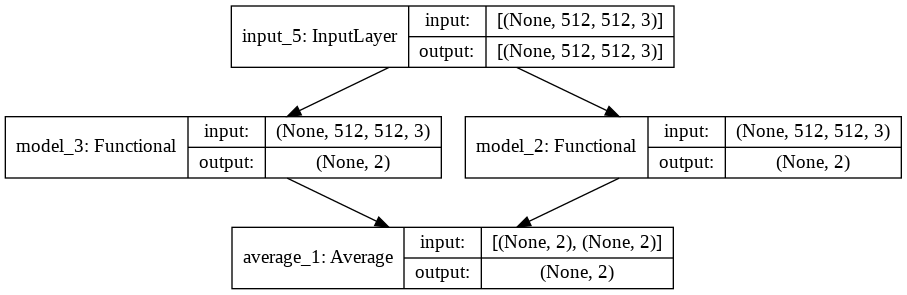

In [ ]:
tf.keras.utils.plot_model(ensemble_model, 'model1.png', show_shapes= True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
filepath="parkinsons_detection_ensemble1.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min',patience=5)
callbacks_list = [checkpoint]

**Model Training**

In [ ]:
hist = ensemble_model.fit(x_train,y_train,
                    shuffle = True,
                    batch_size=32,
                    epochs = 25,
                    validation_split = 0.10,callbacks=callbacks_list)

Epoch 1/25
30/30 [==============================] - 46s 1s/step - loss: 9.5399 - accuracy: 0.7682 - val_loss: 6.3803 - val_accuracy: 0.8462

Epoch 00001: val_loss improved from inf to 6.38034, saving model to parkinsons_detection_ensemble1.hdf5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/25
30/30 [==============================] - 41s 1s/step - loss: 5.4329 - accuracy: 0.9690 - val_loss: 4.8898 - val_accuracy: 0.8365

Epoch 00002: val_loss improved from 6.38034 to 4.88980, saving model to parkinsons_detection_ensemble1.hdf5
Epoch 3/25
30/30 [==============================] - 41s 1s/step - loss: 4.5337 - accuracy: 0.9861 - val_loss: 4.3809 - val_accuracy: 0.8654

Epoch 00003: val_loss improved from 4.88980 to 4.38091, saving model to parkinsons_detection_ensemble1.hdf5
Epoch 4/25
30/30 [==============================] - 41s 1s/step - loss: 4.1414 - accuracy: 0.9936 - val_loss: 4.0070 - val_accuracy: 0.9519

Epoch 00004: val_loss improved from 4.38091 to 4.00701, saving model to parkinsons_detection_ensemble1.hdf5
Epoch 5/25
30/30 [==============================] - 41s 1s/step - loss: 3.8594 - accuracy: 0.9915 - val_loss: 3.8177 - val_accuracy: 0.8558

Epoch 00005: val_loss improved from 4.00701 to 3.81768, saving model to parkinsons_detection_ensemble1.hdf5
Epoc

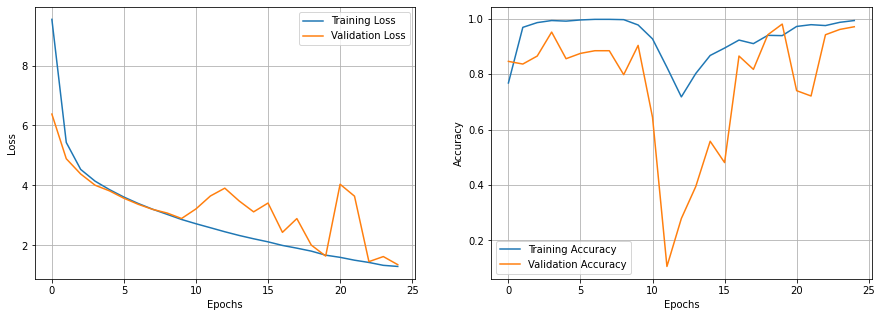

In [ ]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

**Testing Ensemble Model**

In [ ]:
test_images = "/content/drive/MyDrive/parkinsons t2/test"

test_image_data = []
test_labels = []

test_folders = os.listdir(test_images)
print(test_folders)

label_dict = {
    'control':0,
    'pd':1
}

from keras.preprocessing import image

for ix in test_folders:
    path = os.path.join(test_images,ix)
    for im in os.listdir(path):
        img = image.load_img(os.path.join(path,im),target_size = ((512,512)))
        img_array = image.img_to_array(img)
        test_image_data.append(img_array)
        test_labels.append(label_dict[ix])
        

combined = list(zip(test_image_data,test_labels))
test_image_data[:],test_labels[:] = zip(*combined)

x_test = np.array(test_image_data)
y_test = np.array(test_labels)

from keras.utils import np_utils

y_test = np_utils.to_categorical(y_test)
print(x_test.shape,y_test.shape)
    

['pd', 'control']
(100, 512, 512, 3) (100, 2)


In [ ]:
ensemble_model.evaluate(x_test,y_test)

4/4 [==============================] - 10s 3s/step - loss: 1.3815 - accuracy: 0.9300


[1.381544589996338, 0.9300000071525574]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions = ensemble_model.predict(x_test, batch_size = 32)
pred = np.argmax(predictions, axis=1)

In [ ]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        50
           1       1.00      0.86      0.92        50

    accuracy                           0.93       100
   macro avg       0.94      0.93      0.93       100
weighted avg       0.94      0.93      0.93       100



In [ ]:
print(confusion_matrix(test_labels, pred))

[[50  0]
 [ 7 43]]
